In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# Load the data
df = pd.read_csv('USA_Data.csv')

# Select the desired columns
df = df[['state', 'house_size', 'city', 'bed', 'bath','price']]


In [93]:
# Get the number of rows and columns
num_rows, num_columns = df.shape

print(f'The dataset has {num_rows} rows and {num_columns} columns.')

The dataset has 904966 rows and 6 columns.


In [94]:
# Check for null values in each column
null_values = df.isnull().sum()
print(null_values)

state              0
house_size    292886
city              72
bed           129840
bath          113884
price             71
dtype: int64


In [95]:
# Drop rows with null values in the 'price' column
df = df.dropna(subset=['price'])

# Fill missing values for numerical columns with median
numerical_cols = ['bed', 'bath' , 'house_size']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# Drop rows with null values in the 'city' column
df = df.dropna(subset=['city'])


categorical_cols = ['state', 'city']
for col in categorical_cols:
    label_encoders = {}
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


In [96]:
# Check for null values in each column
null_values = df.isnull().sum()
print(null_values)

state         0
house_size    0
city          0
bed           0
bath          0
price         0
dtype: int64


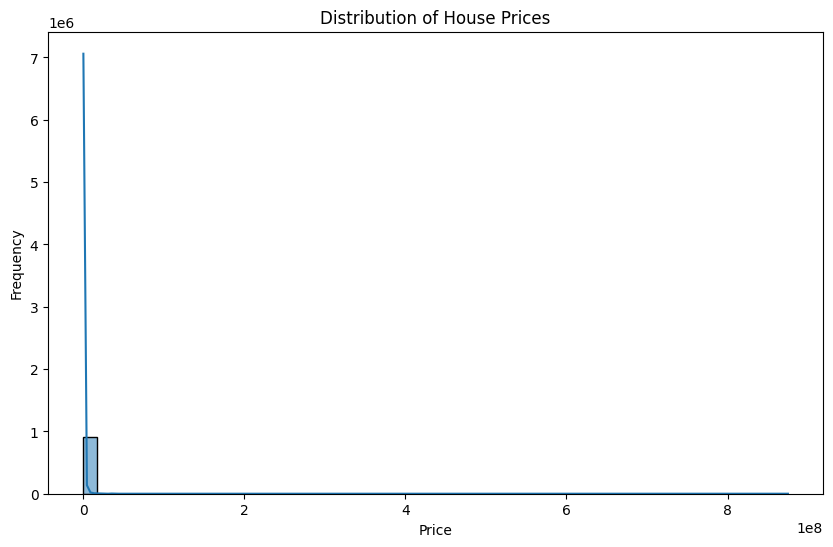

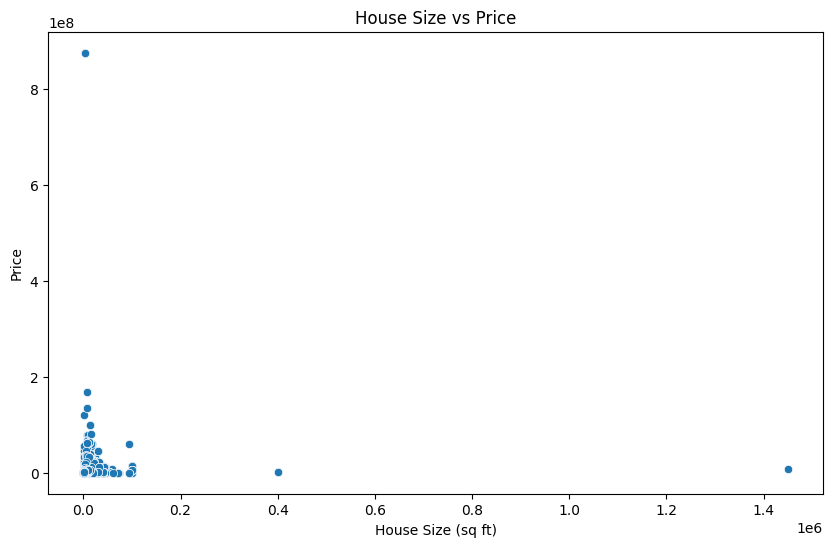

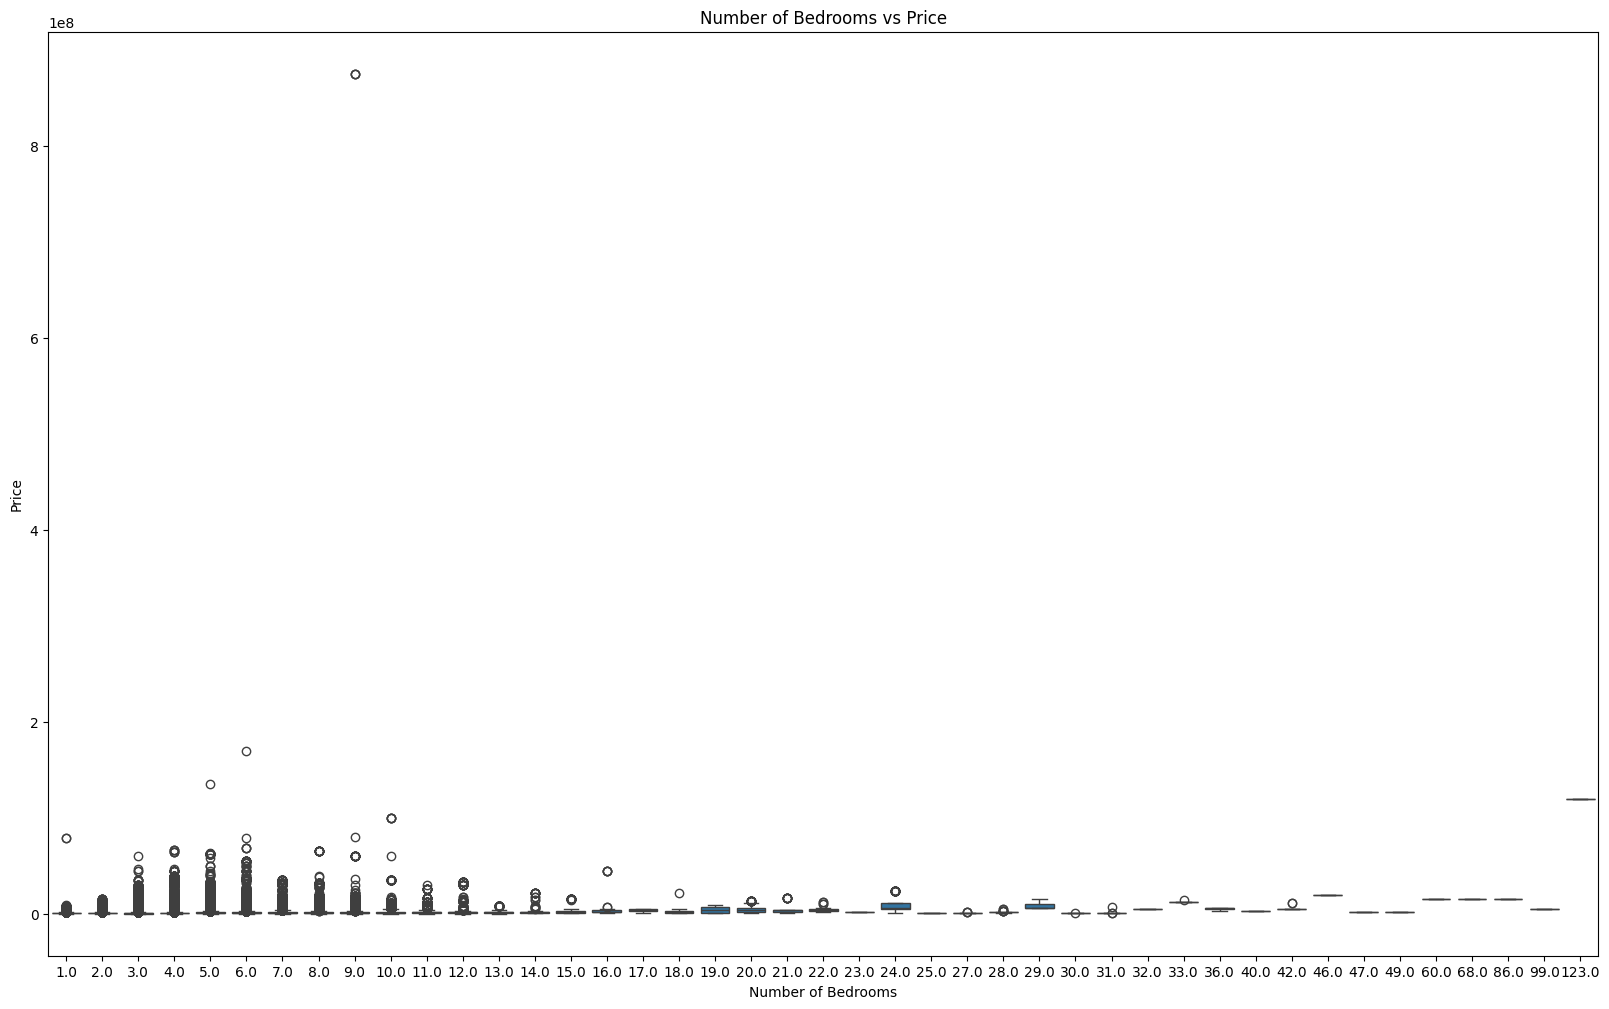

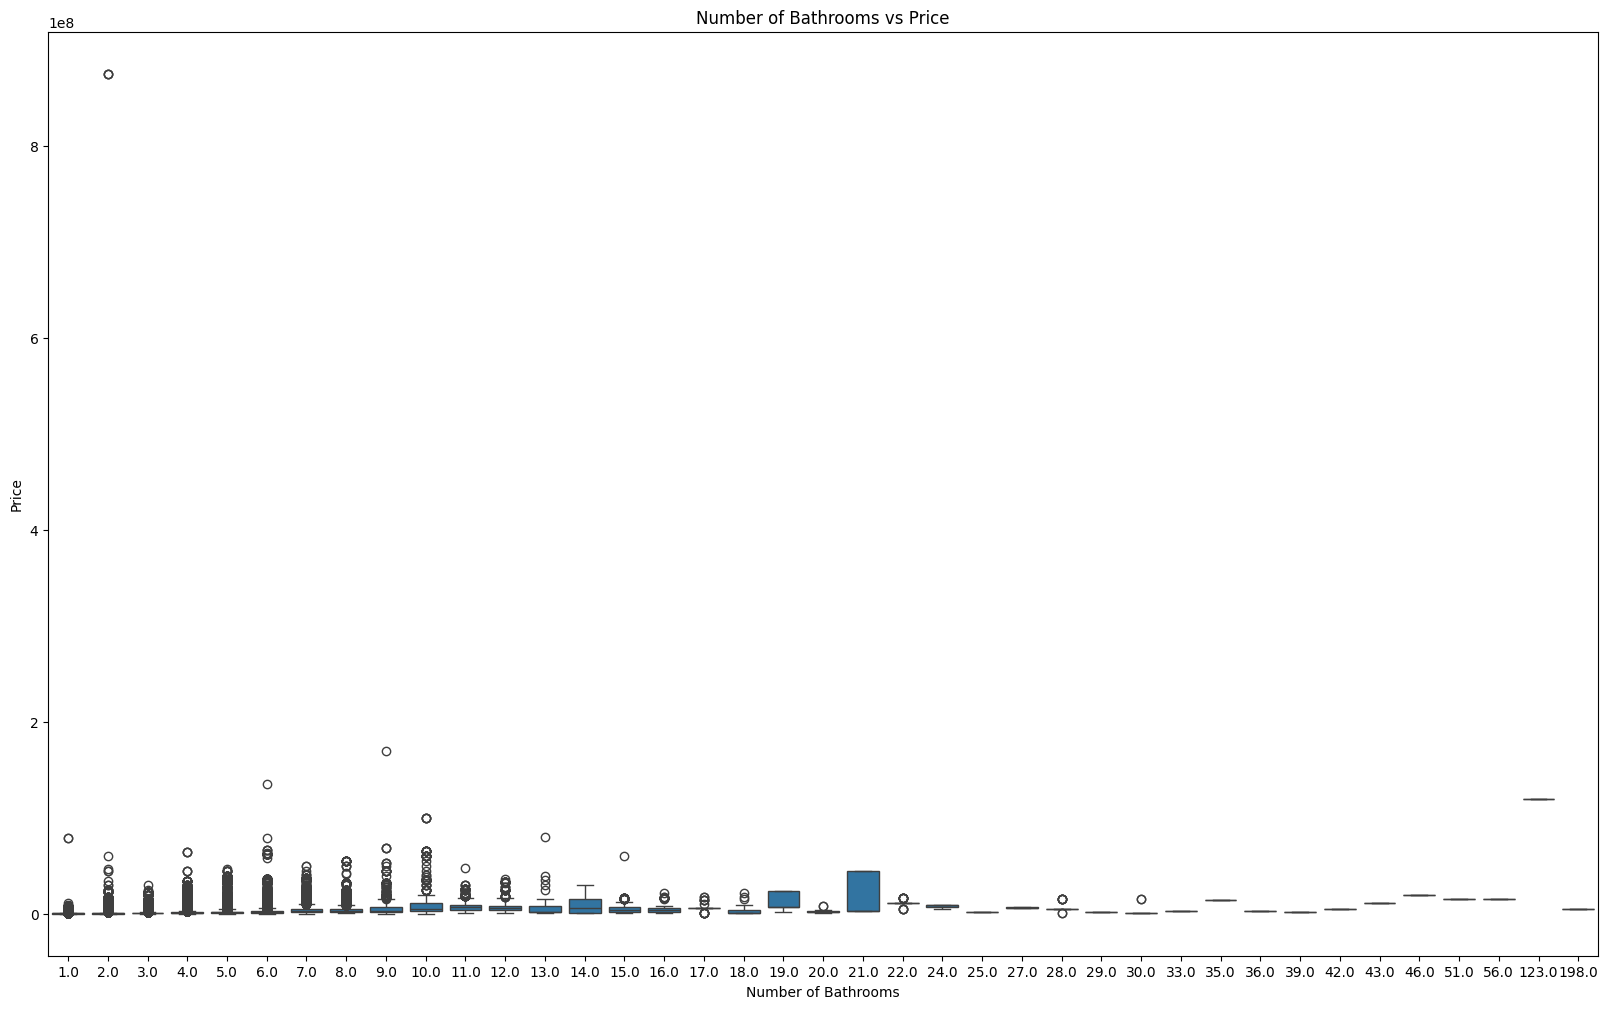

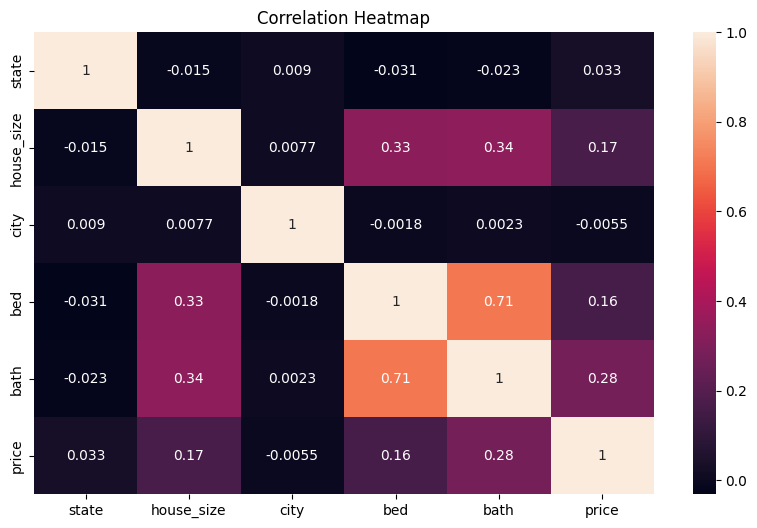

In [97]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='house_size', y='price', data=df)
plt.title('House Size vs Price')
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(20, 12))
sns.boxplot(x='bed', y='price', data=df)
plt.title('Number of Bedrooms vs Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(20, 12))
sns.boxplot(x='bath', y='price', data=df)
plt.title('Number of Bathrooms vs Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [98]:
df.describe()

,state,house_size,city,bed,bath,price
count,904823.000000,9.048230e+05,904823.000000,904823.000000,904823.000000,9.048230e+05
mean,5.677918,1.980352e+03,1231.934544,3.284530,2.423355,8.774815e+05
std,2.913061,2.516134e+03,702.280632,1.915081,1.813243,2.457787e+06
min,0.000000,1.000000e+02,0.000000,1.000000,1.000000,0.000000e+00
25%,4.000000,1.360000e+03,614.000000,2.000000,2.000000,2.688880e+05
50%,6.000000,1.650000e+03,1330.000000,3.000000,2.000000,4.750000e+05
75%,7.000000,2.016000e+03,1748.000000,4.000000,3.000000,8.300000e+05
max,17.000000,1.450112e+06,2486.000000,123.000000,198.000000,8.750000e+08


In [99]:
features = ['bed', 'bath', 'city', 'house_size','state']
X = df[features]
y = df['price']

In [100]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the model
rf = RandomForestRegressor(random_state=100)

# Fit the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 97819.64378100676
Mean Squared Error: 341560714398.64044
Root Mean Squared Error: 584431.9587416832
R-squared: 0.956716782258469
